In [125]:
import pandas as pd
import matplotlib.pyplot as plt


In [169]:
train_trans=pd.read_csv("Train_trans.csv")

In [3]:
pd.set_option('display.max_columns', None)
train_trans.describe()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.00000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000
mean,16.274839,16.521473,16.277490,16.355560,-0.043389,-0.053018,25.800928,26.353566,25.903624,26.081865,-0.094954,-0.114908,0.590593,16.343948,26.082150,16.335808,26.060941,16.344470,26.081787,16.388272,26.127173,16.316412,26.064004,16.373961,26.116722,16.579331,26.561563,16.546822,26.510883,16.415961,26.238740,16.51461,26.382522,-0.108077,-0.100143,-0.089710,-0.118150,-0.039316,-0.038808,-0.047337,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,0.232123
std,15.374342,15.425769,15.305041,15.127922,0.776305,0.756452,29.243961,29.459305,29.269789,28.979008,1.270488,1.324785,0.491731,15.208344,29.158269,15.196279,29.138853,15.142292,29.048877,15.114650,28.896692,14.902038,28.612361,14.824743,28.402516,14.756009,28.364380,14.512375,27.859306,14.161609,27.130185,13.82671,26.413544,1.385724,1.373807,1.322031,1.375298,0.720808,0.787685,0.818200,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,0.422193
min,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,0.000000,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.76000,0.370000,-58.820000,-61.173333,-29.996667,-47.583333,-17.450000,-56.886667,-85.763333,14.666667,14.416667,0.000000,0.090909,304.050833,298.250000,4.890000,4.131111,4112.454545,1.000000,9.021111,0.000000
25%,4.910000,4.920000,4.900000,4.900000,-0.066667,-0.100000,4.200000,4.210000,4.200000,4.200000,-0.183333,-0.233333,0.000000,4.910000,4.210000,4.910000,4.200000,4.900000,4.210000,4.900000,4.200000,4.900000,4.200000,4.900000,4.210000,4.920000,4.230000,4.940000,4.250000,4.960000,4.270000,4.98000,4.340000,-0.190000,-0.206667,-0.203333,-0.240000,-0.086667,-0.086667,-0.090000,74.647059,74.500000,3.565217,1.052632,342.770532,339.267541,13.912625,21.418250,4151.666667,11.333333,35.364068,0.000000
50%,5.770000,5.830000,5.780000,5.790000,0.000000,-0.003333,5.860000,5.920000,5.850000,5.890000,-0.003333,-0.003333,1.000000,5.810000,5.90

In [155]:
train_trans.shape

(40500, 54)

<h2>Test a few models</h2>

1. logistic
2. neural network
3. ensembling trees
4. knn
5. naive bayes
6. svm

In [128]:
X_train=train_trans.drop(["fail_7"],axis=1)
Y_train=train_trans["fail_7"]

In [129]:
# Load libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Spot Check Algorithms
models = []

# Gaussian Naive Bayes
models.append(('NB', GaussianNB())) 

# Logistic regression
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))

#KNN
models.append(('KNN',KNeighborsClassifier()))

#Kernalize SVM
models.append(('SVM',SVC()))

#GBDT
models.append(('GBDT', GradientBoostingClassifier(random_state=0)))


In [130]:
#pip install joblib
from joblib import parallel_backend

In [132]:
# evaluate each model in turn
#split into 5 for cross validation 

#For int/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
results = []
names = []
with parallel_backend('threading', n_jobs=-1):
    for name,model in models:
        kfold = StratifiedKFold(n_splits=5, random_state=0,shuffle=True)
        cv_results = cross_val_score(model, 
                                     X_train,
                                     Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print('%s: %f (%f)' % (name,cv_results.mean(),cv_results.std()))

NB: 0.617852 (0.007503)
LR: 0.767778 (0.000547)
KNN: 0.727852 (0.005497)
SVM: 0.767877 (0.000049)
GBDT: 0.813086 (0.003567)


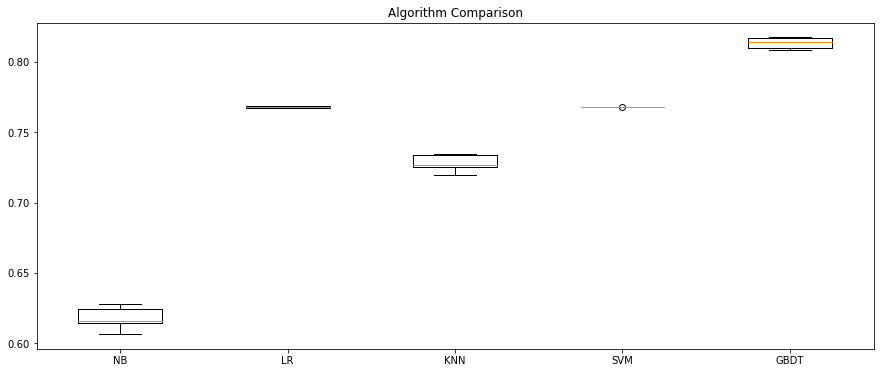

In [133]:
# Compare Algorithms
fig,ax = plt.subplots(figsize=(15,6))
ax.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show() 
#USE GBDT AS EVALUATION METHOD FOR NOW

<h2>Create methods to evaluate new features adding</h2>

1. cv score(USE THIS, GBDT CV SCORE for now)
2. aic, bic
3. feature importance rank

<h2>Quick Model Evaluation</h2>

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=0)

with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(rf,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [111]:
score_record

0.813111111111111

In [154]:
p=train_trans.shape[1]
p

54

In [13]:
from sklearn.neural_network import MLPClassifier

mlp=MLPClassifier(random_state=0,hidden_layer_sizes=[1])

with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(mlp,X_train,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [14]:
score_record
#MLP only need 1 layer and of size 1 node to get 0.767, which is basically like logistic regression

0.7678765432098766

<h2>Graph time series</h2>

In [15]:
import re

In [16]:
def plot_by_group(pattern):
    match=[]
    names=[]
    for item in train_trans.columns:
        result = re.match(pattern, item)
        match.append(bool(result))
        if bool(result):
            names.append(item)
    group=train_trans[names]
    group.mean().plot(kind="line")
    plt.show()

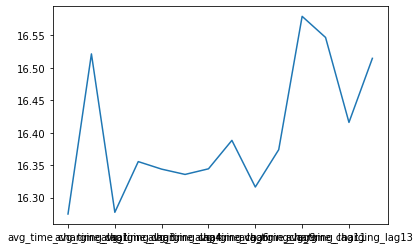

In [17]:
plot_by_group("^avg_time_charging_lag")

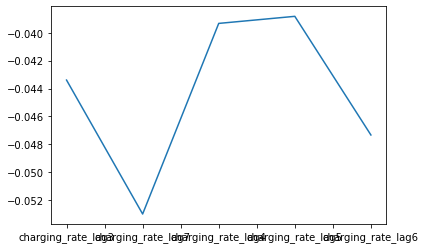

In [18]:
plot_by_group("^charging_rate_lag")

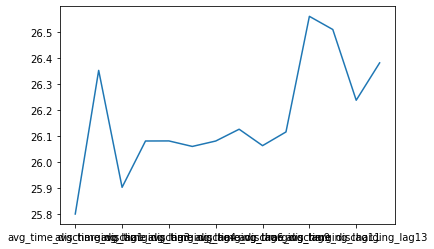

In [19]:
plot_by_group("^avg_time_discharging_lag")

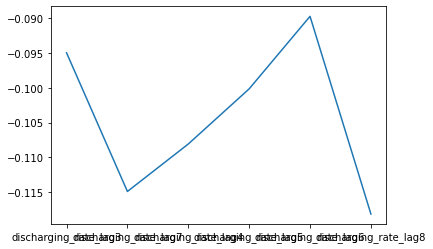

In [20]:
plot_by_group("^discharging_rate_lag")

<h2>feature engineering</h2>

In [168]:
train_trans.columns

Index(['avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_disc

In [116]:
#start a new df for feature engineering
df_eng=train_trans

In [117]:
pattern=("^avg_time_charging_lag")
match=[]
names=[]
for item in train_trans.columns:
    result = re.match(pattern, item)
    match.append(bool(result))
    if bool(result):
        names.append(item)
names

['avg_time_charging_lag1',
 'avg_time_charging_lag2',
 'avg_time_charging_lag3',
 'avg_time_charging_lag7',
 'avg_time_charging_lag4',
 'avg_time_charging_lag5',
 'avg_time_charging_lag6',
 'avg_time_charging_lag8',
 'avg_time_charging_lag9',
 'avg_time_charging_lag10',
 'avg_time_charging_lag11',
 'avg_time_charging_lag12',
 'avg_time_charging_lag13',
 'avg_time_charging_lag14']

In [118]:
df_eng["test"]=0
for item in names:
    df_eng["test"]=df_eng["test"]+df_eng[item]
df_eng["test"]=df_eng["test"]/len(names)
df_eng["test"]


0        20.321286
1        18.247571
2        14.462143
3        15.245714
4        19.771429
           ...    
40495    13.792857
40496    18.573571
40497    14.123571
40498    14.321429
40499    18.780714
Name: test, Length: 40500, dtype: float64

In [119]:
df_eng["test"].equals(df_eng["avg_time_charging"])
#avg_time_charging!=avg of time series!

False

In [120]:
X_train_eng=df_eng.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [153]:
score_record
#improved, can keep this

0.813283950617284

<h3>new feature testing process</h3>

use code block above,make new features to df_eng, if score is larger than 0.813086 of original GBDT, can keep it, 
otherwise, useless features,discard it

<h2>Several Ideas</h2>


1. average of each time series
2. charging_time*rate, same for discharge->total electricity charged/discharged
3. 

In [294]:
#------------------------------------

##### Negative
1. chargecycles | cycle_time (-0.81)
2. chargecycles | avg_time_charging (-0.81)
3. chargecycles | avg_time_discharging (-0.81)
4. chargecycles | avg_time_charging_14 (-0.71)
5. chargecycles | avg_time_discharging_14 (-0.71)


6. dischargecycles | cycle_time (-0.81)
7. dischargecycles | avg_time_charging (-0.81)
8. dischargecycles | avg_time_discharging (-0.81)
9. dischargecycles | avg_time_charging_14 (-0.71)
10. dischargecycles | avg_time_discharging_14 (-0.71)

##### Positive
1. cycle_time | avg_time_charging (0.99)
2. cycle_time | avg_time_charging_14 (0.86)
3. cycle_time | avg_time_discharging (1.00)
4. cycle_time | avg_time_discharging_14 (0.87)


5. max_voltage_day | avg_volt_change_charging (0.91)
6. max_voltage_day | avg_volt_change_discharging (0.89)


7. avg_volt_change_charging | avg_volt_change_discharging (0.97)

In [295]:
# chargecycles | cycle_time (-0.81)

In [227]:
train_trans=pd.read_csv("Train_trans.csv")
df_eng1=train_trans

In [229]:
df_eng1["test"]=0
df_eng1["test"]=df_eng1['chargecycles']*df_eng1['cycle_time']         
df_eng1["test"]
X_train_eng=df_eng1.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record1=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

0        3050.237813
1        2932.324898
2        2744.741588
3        3898.477812
4        3525.569955
            ...     
40495    3083.568186
40496    2994.807511
40497    4036.253223
40498    3524.139100
40499    4263.827107
Name: test, Length: 40500, dtype: float64

In [232]:
score_record1

0.8131851851851852

In [233]:
#2 chargecycles | avg_time_charging (-0.81)
train_trans=pd.read_csv("Train_trans.csv")
df_eng2=train_trans
df_eng2["test"]=0
df_eng2["test"]=df_eng2['chargecycles']*df_eng2['avg_time_charging']         
df_eng2["test"]
X_train_eng=df_eng2.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record2=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

0        1090.236562
1        1119.161021
2        1099.228663
3        1495.938200
4        1335.863822
            ...     
40495    1158.111058
40496    1146.410222
40497    1514.230413
40498    1369.813700
40499    1663.360744
Name: test, Length: 40500, dtype: float64

In [226]:
score_record2

0.8131604938271606

In [234]:
#3 chargecycles | avg_time_discharging (-0.81)
train_trans=pd.read_csv("Train_trans.csv")
df_eng3=train_trans
df_eng3["test"]=0
df_eng3["test"]=df_eng3['chargecycles']*df_eng3['avg_time_discharging']         
df_eng3["test"]


0        1960.001250
1        1813.163878
2        1645.512925
3        2402.539612
4        2189.706133
            ...     
40495    1925.457126
40496    1848.397289
40497    2522.022810
40498    2154.325400
40499    2600.466364
Name: test, Length: 40500, dtype: float64

In [235]:
X_train_eng=df_eng3.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record3=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [236]:
score_record3

0.8127654320987654

In [257]:
#4 chargecycles | avg_time_charging_14 (-0.71)
train_trans=pd.read_csv("Train_trans.csv")
df_eng4=train_trans
df_eng4["test"]=0
df_eng4["test"]=df_eng4['chargecycles']*df_eng4['avg_time_charging_lag14']         
df_eng4["test"]
X_train_eng=df_eng4.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record4=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [258]:
score_record4

0.8134814814814815

In [255]:
#5 chargecycles | avg_time_discharging_14 (-0.71)
train_trans=pd.read_csv("Train_trans.csv")
df_eng5=train_trans
df_eng5["test"]=0
df_eng5["test"]=df_eng5['chargecycles']*df_eng5['avg_time_discharging_lag14']         
df_eng5["test"]
X_train_eng=df_eng5.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record5=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [256]:
score_record5

0.813037037037037

In [260]:
#6 dischargecycles | cycle_time (-0.81)
train_trans=pd.read_csv("Train_trans.csv")
df_eng6=train_trans
df_eng6["test"]=0
df_eng6["test"]=df_eng6['dischargecycles']*df_eng6['cycle_time']         
df_eng6["test"]
X_train_eng=df_eng6.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record6=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [261]:
score_record6

0.8129876543209876

In [265]:
#7 dischargecycles | avg_time_charging (-0.81)
train_trans=pd.read_csv("Train_trans.csv")
df_eng7=train_trans
df_eng7["test"]=0
df_eng7["test"]=df_eng7['dischargecycles']*df_eng7['avg_time_charging']         
df_eng7["test"]
X_train_eng=df_eng7.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record7=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [266]:
score_record7

0.8132098765432099

In [267]:
#8 dischargecycles | avg_time_discharging (-0.81)
train_trans=pd.read_csv("Train_trans.csv")
df_eng8=train_trans
df_eng8["test"]=0
df_eng8["test"]=df_eng8['dischargecycles']*df_eng8['avg_time_discharging']         
df_eng8["test"]
X_train_eng=df_eng8.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record8=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [268]:
score_record8

0.8132345679012346

In [269]:
#9 dischargecycles | avg_time_charging_14 (-0.71)
train_trans=pd.read_csv("Train_trans.csv")
df_eng9=train_trans
df_eng9["test"]=0
df_eng9["test"]=df_eng9['dischargecycles']*df_eng9['avg_time_charging_lag14']         
df_eng9["test"]
X_train_eng=df_eng9.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record9=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [270]:
score_record9

0.8138518518518518

In [271]:
#10 dischargecycles | avg_time_discharging_14 (-0.71)
train_trans=pd.read_csv("Train_trans.csv")
df_eng10=train_trans
df_eng10["test"]=0
df_eng10["test"]=df_eng10['dischargecycles']*df_eng10['avg_time_discharging_lag14']         
df_eng10["test"]
X_train_eng=df_eng10.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record10=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()



In [272]:
score_record10

0.8132345679012346

In [273]:
#1 POSITIVE: cycle_time | avg_time_charging (0.99)
train_trans=pd.read_csv("Train_trans.csv")
df_engP1=train_trans
df_engP1["test"]=0
df_engP1["test"]=df_engP1['cycle_time']*df_engP1['avg_time_charging']         
df_engP1["test"]
X_train_eng=df_engP1.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP1=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [274]:
score_recordP1

0.812962962962963

In [277]:
#2 cycle_time | avg_time_charging_14 (0.86)
train_trans=pd.read_csv("Train_trans.csv")
df_engP2=train_trans
df_engP2["test"]=0
df_engP2["test"]=df_engP2['cycle_time']*df_engP2['avg_time_charging_lag14']         
df_engP2["test"]
X_train_eng=df_engP2.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP2=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [278]:
score_recordP2

0.8129382716049383

In [280]:
#3 cycle_time | avg_time_discharging (1.00)
train_trans=pd.read_csv("Train_trans.csv")
df_engP3=train_trans
df_engP3["test"]=0
df_engP3["test"]=df_engP3['cycle_time']*df_engP3['avg_time_discharging']         
df_engP3["test"]
X_train_eng=df_engP3.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP3=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [281]:
score_recordP3

0.8132592592592592

In [282]:
#4 cycle_time | avg_time_discharging_14 (0.87)
train_trans=pd.read_csv("Train_trans.csv")
df_engP4=train_trans
df_engP4["test"]=0
df_engP4["test"]=df_engP4['cycle_time']*df_engP3['avg_time_discharging_lag14']         
df_engP4["test"]
X_train_eng=df_engP4.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP4=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [283]:
score_recordP4

0.8128395061728394

In [286]:
#5 max_voltage_day | avg_volt_change_charging (0.91)
train_trans=pd.read_csv("Train_trans.csv")
df_engP5=train_trans
df_engP5["test"]=0
df_engP5["test"]=df_engP5['max_voltage_day']*df_engP5['avg_volt_change_charging']         
df_engP5["test"]
X_train_eng=df_engP5.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP5=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [288]:
score_recordP5

0.813111111111111

In [289]:
#6 max_voltage_day | avg_volt_change_discharging (0.89)
train_trans=pd.read_csv("Train_trans.csv")
df_engP6=train_trans
df_engP6["test"]=0
df_engP6["test"]=df_engP6['max_voltage_day']*df_engP6['avg_volt_change_discharging']         
df_engP6["test"]
X_train_eng=df_engP3.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP6=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [290]:
score_recordP6

0.8132592592592592

In [291]:
#7 avg_volt_change_charging | avg_volt_change_discharging (0.97)
train_trans=pd.read_csv("Train_trans.csv")
df_engP7=train_trans
df_engP7["test"]=0
df_engP7["test"]=df_engP7['avg_volt_change_charging']*df_engP7['avg_volt_change_discharging']         
df_engP7["test"]
X_train_eng=df_engP7.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_recordP7=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [292]:
score_recordP7

0.8130123456790124

In [74]:
# (Total Charging Time + Total Discharging Time)/cycle_time = avg_time_charging + avg_time_discharging ?

In [139]:
#start a new df for feature engineering
df_eng1=train_trans

In [140]:
df_eng1["test2"]=0
df_eng1["test2"]=(df_eng1['avg_time_charging']*df_eng1['chargecycles']
                  +df_eng1['avg_time_discharging']*df_eng1['dischargecycles'])/df_eng1['cycle_time']
df_eng1["test2"]

0        49.928713
1        56.109047
2        80.352404
3        91.704407
4        70.859636
           ...    
40495    83.136145
40496    64.784373
40497    84.642067
40498    94.038869
40499    76.098651
Name: test2, Length: 40500, dtype: float64

In [141]:
df_eng1["test2"].equals(df_eng1["avg_time_charging"]+df_eng['avg_time_discharging'])

False

In [142]:
X_train_eng=df_eng1.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record1=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [143]:
score_record1

0.8130864197530864

In [56]:
# Start a new df for feature engineering
df_eng3=train_trans
df_eng3["Avg_chargeDischargeTime"]=0
df_eng3["Avg_chargeDischargeTime"]=(df_eng3['avg_time_charging']*df_eng3['chargecycles']
                  +df_eng3['avg_time_discharging']*df_eng3['dischargecycles'])/df_eng3['cycle_time']
df_eng3["Avg_chargeDischargeTime"]

0        49.928713
1        56.109047
2        80.352404
3        91.704407
4        70.859636
           ...    
40495    83.136145
40496    64.784373
40497    84.642067
40498    94.038869
40499    76.098651
Name: Avg_chargeDischargeTime, Length: 40500, dtype: float64

In [67]:
X_train_eng=df_eng.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()

In [72]:
score_record

0.8128148148148148

In [69]:
# Start a new df for feature engineering
df_eng["test2"]=0
df_eng["test2"]=df_eng['avg_volt_change_charging']*df_eng['avg_volt_change_discharging']
df_eng["test2"]

0        138550.033050
1        122789.660146
2        118858.614969
3        124609.171375
4        136392.527920
             ...      
40495    129685.711804
40496    141940.081771
40497    118211.644402
40498    132173.719902
40499    116684.353206
Name: test2, Length: 40500, dtype: float64

In [70]:
X_train_eng=df_eng.drop(['fail_7'],axis=1)
gbdt=GradientBoostingClassifier(random_state=0)
with parallel_backend('threading', n_jobs=-1):
    score_record=cross_val_score(gbdt,X_train_eng,Y_train,cv=StratifiedKFold(n_splits=5, random_state=0,shuffle=True),scoring='accuracy').mean()


In [71]:
score_record

0.8128148148148148